# HIV Model
Sam Daitzman / Adi Sudhakar

In [1]:
import sys,os
sys.path.append(os.getcwd())
sys.path

['/private/var/folders/fq/qb7xc4wj6dv8ghkjm1q940zh0000gq/T/ae87943a-e357-4e5e-9795-42ef4dddfad4',
 '/Users/sam/opt/anaconda3/lib/python37.zip',
 '/Users/sam/opt/anaconda3/lib/python3.7',
 '/Users/sam/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/sam/opt/anaconda3/lib/python3.7/site-packages',
 '/Users/sam/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/sam/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/sam/.ipython',
 '/Users/sam/Documents/GitHub/ModSimPy']

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import seaborn as sns

In [3]:
state = State(
    R=1000, # activated normal lymphocytes
    L=0, # latently infected
    E=0, # actively infected
    V=4e-7 # free virions
)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [4]:
system = System(
    gamma=1.36,   # birthrate of R
    mu=1.36e-3,   # natural deathrate of R and L
    delta=0.33,   # deathrate of E
    beta=0.00027, # R-to-L conversion rate (per virion)
    alpha=3.6e-2, # L-to-E rate
    pie=100,      # virion creation rate
    sigma=2,      # virion death rate
    rho=0.1,      # proportion of cells becoming latently infected upon infection
    tau=0.2,      # proportion of cells activated
    t_0=1, t_end=1201,
    dt = 1/24
);

In [5]:
def update_func(system, state):
    # suggestion from Allison: first calculate named flows here to guarantee conservation
    unpack(system)
    
    drdt = gamma * tau - mu * state.R - beta * state.R * state.V
    dldt = rho * beta * state.R * state.V - mu * state.L - alpha * state.L
    dedt = (1 - rho) * beta * state.R * state.V + alpha * state.L - delta * state.E
    dvdt = pie * state.E - sigma * state.V
    
    state.R += drdt * dt
    state.L += dldt * dt
    state.E += dedt * dt
    state.V += dvdt * dt
    return state

In [6]:
def run_simulation(system, state, update_func):
    frame = TimeFrame(columns = state.index)
    frame.row[system.t_0] = state
    
    for t in linrange(system.t_0, system.t_end):
        frame.row[t+1] = update_func(system, frame.row[t])
    return frame

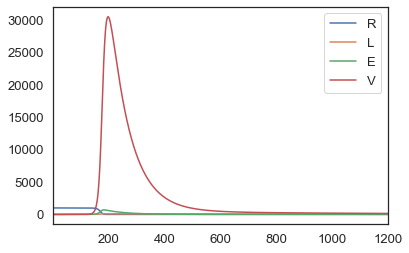

In [11]:
state = State(
    R=1000, # activated normal lymphocytes
    L=0, # latently infected
    E=0, # actively infected
    V=4e-7 # free virions
)
plt = run_simulation(system, state, update_func).plot()